In [1]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt


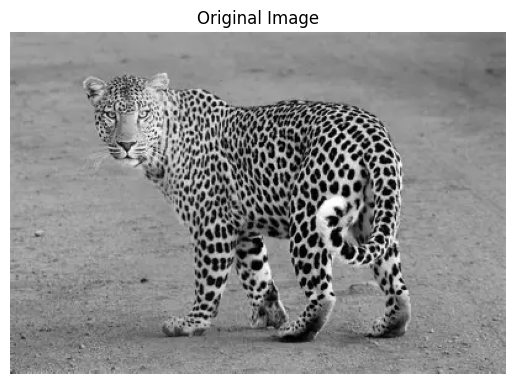

In [2]:
image_path = 'leopard.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

In [1]:
def reduce_intensity_levels(image, levels):
    factor = 256 // levels
    reduced = (image // factor) * factor
    return reduced

levels_list = [2, 4, 8]

for lvl in levels_list:
    reduced_img = reduce_intensity_levels(img, lvl)
    plt.imshow(reduced_img, cmap='gray')
    plt.title(f'Task 1 - Intensity Reduced to {lvl} Levels')
    plt.axis('off')
    plt.show()


NameError: name 'img' is not defined

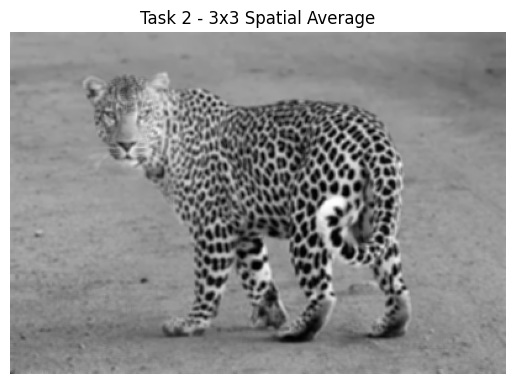

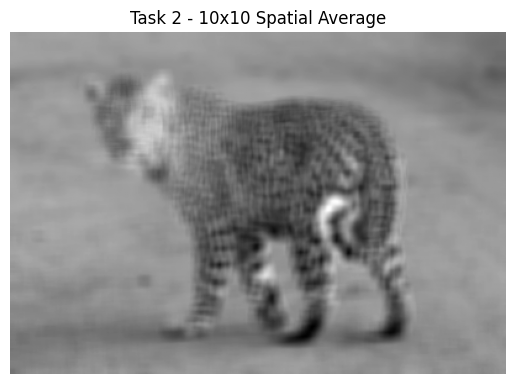

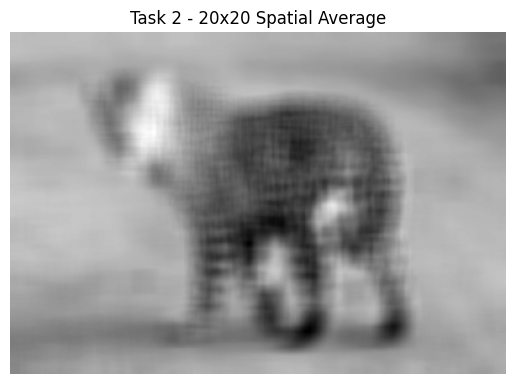

In [4]:
def spatial_average(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)
    return cv2.filter2D(image, -1, kernel)

for k in [3, 10, 20]:
    avg_img = spatial_average(img, k)
    plt.imshow(avg_img, cmap='gray')
    plt.title(f'Task 2 - {k}x{k} Spatial Average')
    plt.axis('off')
    plt.show()


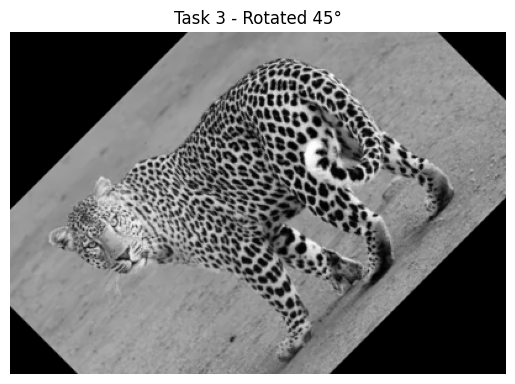

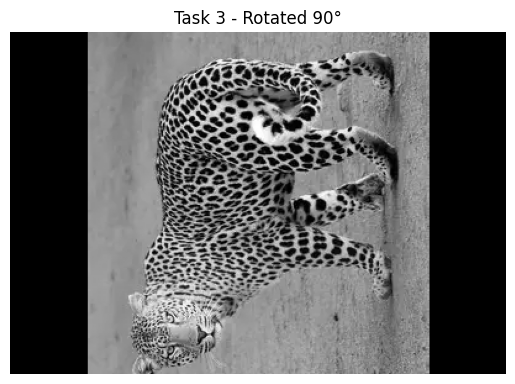

In [5]:
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

for angle in [45, 90]:
    rot_img = rotate_image(img, angle)
    plt.imshow(rot_img, cmap='gray')
    plt.title(f'Task 3 - Rotated {angle}°')
    plt.axis('off')
    plt.show()


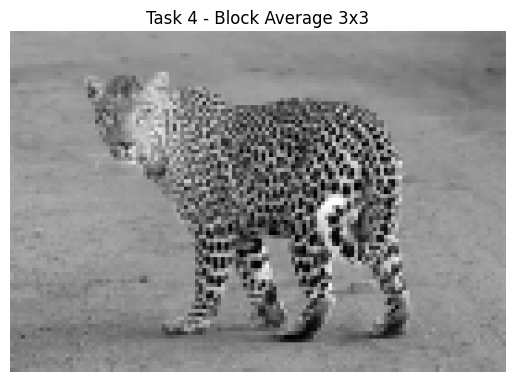

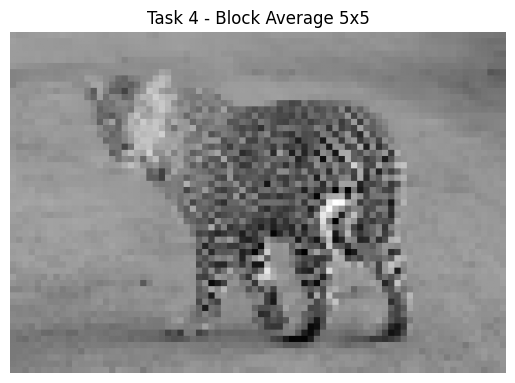

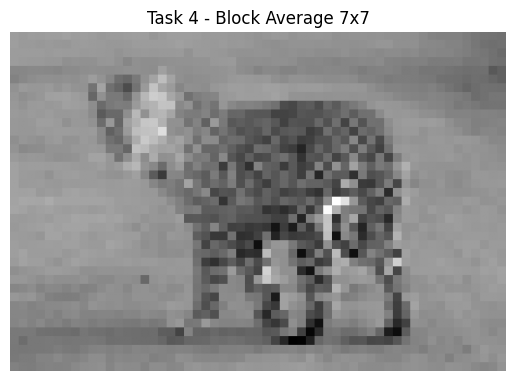

In [6]:
def block_average(image, block_size):
    h, w = image.shape
    h_crop = h - (h % block_size)
    w_crop = w - (w % block_size)
    image = image[:h_crop, :w_crop]

    output = image.reshape(h_crop // block_size, block_size, w_crop // block_size, block_size)
    output = output.mean(axis=(1, 3)).astype(np.uint8)
    return np.kron(output, np.ones((block_size, block_size), dtype=np.uint8))

for block_size in [3, 5, 7]:
    block_img = block_average(img, block_size)
    plt.imshow(block_img, cmap='gray')
    plt.title(f'Task 4 - Block Average {block_size}x{block_size}')
    plt.axis('off')
    plt.show()


In [7]:
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

In [ ]:
def main():
    image_path = 'leopard.jpg'  
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Task 1: Intensity Reduction for multiple levels
    for intensity_levels in [2, 4, 8]:
        reduced_img = reduce_intensity_levels(img, intensity_levels)
        filename = f'reduced_intensity_{intensity_levels}.png'
        cv2.imwrite(filename, reduced_img)
        print(f'Saved {filename}')

    # Task 2: Spatial Averaging
    avg3 = spatial_average(img, 3)
    avg10 = spatial_average(img, 10)
    avg20 = spatial_average(img, 20)
    cv2.imwrite('average_3x3.png', avg3)
    cv2.imwrite('average_10x10.png', avg10)
    cv2.imwrite('average_20x20.png', avg20)

    # Task 3: Rotation
    rot45 = rotate_image(img, 45)
    rot90 = rotate_image(img, 90)
    cv2.imwrite('rotated_45.png', rot45)
    cv2.imwrite('rotated_90.png', rot90)

    # Task 4: Block Averaging
    block3 = block_average(img, 3)
    block5 = block_average(img, 5)
    block7 = block_average(img, 7)
    cv2.imwrite('block_avg_3x3.png', block3)
    cv2.imwrite('block_avg_5x5.png', block5)
    cv2.imwrite('block_avg_7x7.png', block7)

    print("✅ All tasks completed. Processed images saved.")

if __name__ == '__main__':
    main()


✅ All tasks completed. Processed images saved.
